### Import stuff

#### Libraries

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\nbconvert\exporters\exporter_locator.py:28: DeprecationWarning: `nbconvert.exporters.exporter_locator` is deprecated in favor of `nbconvert.exporters.base` since nbconvert 5.0.
  DeprecationWarning)
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\nbconvert\preprocessors\regexremove.py:41: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  patterns = List(Unicode, default_value=[r'\Z']).tag(config=True)
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\traitlets


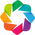

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import os
from text_clustering import text_preprocessing as tp
import numpy as np
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()
import matplotlib.pylab as pylab
import pickle
import pandas as pd
from text_clustering import viz
from sklearn.decomposition import PCA

#### Paths

In [2]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
by_grade_path = os.path.join(output_path,'textos_ulloa_by_curso')
by_grade_and_content = os.path.join(data_path,'textos_ulloa_by_grade_content')
by_content_path = os.path.join(output_path,'textos_ulloa_by_contenido')
all_files_path = os.path.join(data_path,'textos_ulloa')
all_classes = os.path.join(data_path,'clases_ulloa.txt')

#### Recover data

In [6]:
with open(os.path.join(pickle_path,'plane_1.pickle'),'rb') as f:
    axis_X = pickle.load(f)
    axis_Y = pickle.load(f)
    label_x = pickle.load(f)
    label_y = pickle.load(f)
    T_x = pickle.load(f)        
    T_y = pickle.load(f)    

### Sesiones

In [51]:
all_documents_dict = tp.read_documents(all_files_path)

In [8]:
with open(os.path.join(output_path,'pickles','document_length_dict.pickle'),'rb') as f:
    document_length = pickle.load(f)

In [52]:
dict_by_grade_and_content = tp.get_dict_files_with_grade_and_content(by_grade_and_content)
names_docs = all_documents_dict.keys()
document_labels = tp.get_labels_by_document(names_docs,dict_by_grade_and_content)

In [10]:
FILTER_BY_LENGTH = True
MIN_LENGTH = 20 # minutos
document_length_filtered = {}
if FILTER_BY_LENGTH:
    filtered_documents = {}
    for document in all_documents_dict.keys():
        if document_length[document]> MIN_LENGTH:
            document_length_filtered[document] = document_length[document]
            filtered_documents[document] = all_documents_dict[document]
    all_documents_dict = filtered_documents

In [11]:
range(2)

[0, 1]

In [12]:
def split_documents_in_acts(dict_doc,dict_length,n_etapas):
    documents_splitted = {}
    document_lengths = []
    for doc in dict_doc.keys():
        length = dict_length[doc]
        doc_text = dict_doc[doc].splitlines()
        n_lineas = len(doc_text)
        n_lineas_10_min = int((10*60)/5)# n lineas 10 min
        n_lineas_act = int((n_lineas - (n_lineas_10_min*2))/(n_etapas-2))
        inicio = doc_text[:n_lineas_10_min] # primeros 10m
        descenlace = doc_text[-n_lineas_10_min:] # ultimos 10m
        documents_splitted[doc] = {}
        documents_splitted[doc]['inicio'] = '\n'.join(inicio)
        documents_splitted[doc]['descenlace'] = '\n'.join(descenlace)
        for i in range(n_etapas-2):
            documents_splitted[doc]['intermedio_'+str(i)] = '\n'.join(doc_text[n_lineas_10_min+(i*n_lineas_act):(n_lineas_10_min + (n_lineas_act*(i+1)))])
        document_lengths.append(n_lineas_10_min)
        for j in range(n_etapas):
            document_lengths.append(n_lineas_act)
        document_lengths.append(n_lineas_10_min)        
    return documents_splitted,document_lengths

In [13]:
def get_labels_and_splitted_documents(dict_labels,dict_doc,etapas=['inicio','intermedio_0','intermedio_1','descenlace']):
    documents_separated = {}
    labels = []
    for doc in dict_doc.keys():
        new_label = dict_labels[doc]['grade']+'_'+dict_labels[doc]['content']
        new_label = new_label.replace(' ','_')
        for i in range(len(etapas)):
            new_key = doc+'_'+etapas[i]
            documents_separated[new_key] = dict_doc[doc][etapas[i]]
            labels.append(new_key+'_'+new_label)
    return labels,documents_separated

In [14]:
def get_labels_and_splitted_documents_by_session(dict_labels,dict_doc,etapas=['inicio','intermedio_0','intermedio_1','descenlace']):
    set_dict = []
    set_labels = []
    for doc in dict_doc.keys():
        documents_separated = {}
        labels = []
        new_label = dict_labels[doc]['grade']+'_'+dict_labels[doc]['content']
        new_label = new_label.replace(' ','_')
        for i in range(len(etapas)):
            new_key = doc+'_'+etapas[i]
            documents_separated[new_key] = dict_doc[doc][etapas[i]]
            labels.append(new_key+'_'+new_label)
        set_labels.append(labels)
        set_dict.append(documents_separated)
    return set_labels,set_dict

In [15]:
document_splitted,document_lengths = split_documents_in_acts(all_documents_dict,document_length_filtered,4)

In [16]:
labels,document_splitted_2 = get_labels_and_splitted_documents(dict_by_grade_and_content,document_splitted)

In [17]:
labels_by_session,document_splitted_by_session = get_labels_and_splitted_documents_by_session(dict_by_grade_and_content,document_splitted)

In [18]:
n_sessions = len(document_splitted_2)
print n_sessions

216


In [19]:
len(labels)

216

In [20]:
all_documents_dict_2 = document_splitted_2

In [21]:
stop_words_spanish = stopwords.words('spanish')

In [80]:
dict_by_grade_and_content_2 = {}
for k in all_documents_dict_2.keys():
    dict_by_grade_and_content_2[k] = dict_by_grade_and_content[k.split('_')[0]]

### Tópicos

In [23]:
with open(os.path.join(pickle_path,'clean_topics_english.pickle'),'rb') as f:
    topic_names = pickle.load(f)
    topic_score = pickle.load(f)
    topic_words = pickle.load(f)

In [24]:
with open(os.path.join(pickle_path,'topics_heber_sessions.pickle'),'rb') as f:
    dict_words_topics_index = pickle.load(f)
    topic_vectors = pickle.load(f)
    sorted_index = pickle.load(f)

In [25]:
selected_topics = map(lambda x: topic_names[x],sorted_index[-16:]) # top 16 topics
selected_t_words = map(lambda x: topic_words[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda x: topic_score[x],sorted_index[-16:]) # top 16 topics
selected_t_scores = map(lambda l: map(lambda x: float(x.replace('.','').replace(',','.')),l),selected_t_scores)

In [26]:
#clean_words,clean_scores = clean_selected_words(selected_t_words,selected_t_scores)
topic_score_word_dict = {}
for i in range(len(selected_topics)):
    for s,w in enumerate(selected_t_words[i]):
        score = selected_t_scores[i][s]
        a_vector = np.array([score if i==j else 0 for j in range(len(selected_topics))])
        if w in topic_score_word_dict:
            topic_score_word_dict[w] += a_vector
        else:
            topic_score_word_dict[w] = a_vector

In [27]:
selected_topics

['Kinematics',
 'Observe',
 'Time units',
 'Gas laws',
 'Electric-circuits',
 'Explain',
 'Solar system',
 'Electrostatics',
 'Compute',
 'Excercise',
 'Forms of energy',
 'Numbers',
 'Enquire',
 'Water resources',
 'Order',
 'Dynamics']

In [29]:
for i in zip(selected_topics,selected_t_words):
    print " "
    print i[0]+": "+", ".join(i[1])
    #print i
    print " "
    print "------------------------------------------------------------------------------------ "

 
Kinematics: rapidez, automóvi, velocida, direcció, roce, rueda, tiempo, mismo, puede, recorre, misma, máquinas, hace, depende, mueve, objeto, cae, asientos, pasajero
 
------------------------------------------------------------------------------------ 
 
Observe: ver, ventana, máxima, laborato, sombra, linterna, observar, salió, pastel, mínimos, rea, hilo, eclipse, oah, oaa, apoyo, observan, pequeños, revisar
 
------------------------------------------------------------------------------------ 
 
Time units: horas, hora, media, circular, tiempo, camino, coincide, día, mañana, contando, planilla, decir, tarde, muestra, DIGITide, conectad, duración, comienza, quiere, conecta
 
------------------------------------------------------------------------------------ 
 
Gas laws: presión, gas, atm, gases, temperat, contened, recipien, relación, DIGITtem, boyle, cerrado, comas, experime, presione, lussac, gay, prendas, introduj
 
--------------------------------------------------------------

#### Functions

In [30]:
len(selected_topics)
np.zeros((len(selected_topics),1)).shape

(16L, 1L)

In [31]:
def look_for_topic_score(a_dict,word):
    values = []
    the_keys = a_dict.keys()
    for key in the_keys:
        if word.startswith(key):
            values = a_dict[key]
            return values
    size = len(selected_topics)
    return np.zeros((1,size))

In [32]:
def get_sqrt_product_matrix(a_vector):
    size = len(a_vector)
    a_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            a_matrix[i,j] = np.sqrt(a_vector[i] * a_vector[j])
    return a_matrix

In [33]:
def get_co_ocurrance(list_of_topic_words,list_of_topic_scores,msw):
    n_topics = len(list_of_topic_words)
    co_occurrance_matrix = np.zeros((n_topics,n_topics))
    words = (" ".join(msw)).split()
    msw_topic_score =  np.zeros((1,n_topics))
    for word in words:
        # each word is related to the 9 topics in some way
        msw_topic_score += look_for_topic_score(topic_score_word_dict,word)
    adj_matrix = get_sqrt_product_matrix(msw_topic_score[0])
    return adj_matrix

### Get ENA's edges

#### Co-occurrence matrix

In [53]:
len(all_documents_dict.keys())

56

In [54]:
msw_length = 5 # moving stanza window length
n_topics = len(selected_topics)
co_occurrence_matrix = np.zeros((n_topics,n_topics))
counter = 0
maxes = []
for document in all_documents_dict.keys():
    try:
        doc_lines = all_documents_dict[document].splitlines()
    except:
        print "**"
        print document
    for i in range(len(doc_lines)):
        if i <= len(doc_lines)-msw_length:
            counter += 1
            j = i+msw_length
            a_matrix = get_co_ocurrance(selected_t_words,selected_t_scores,doc_lines[i:j])
            co_occurrence_matrix += a_matrix
            maxes.append(np.max(a_matrix))

In [55]:
print len(maxes)
print np.mean(maxes)*len(maxes)
pd.DataFrame(co_occurrence_matrix)

31457
6293.424000000001


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,552.188900,188.893125,247.559096,100.027032,156.800144,194.131055,207.730931,229.958807,399.406689,323.166099,317.161945,322.584078,249.709107,168.791111,274.931773,312.629921
1,188.893125,564.800200,133.101564,89.278427,83.520788,121.800249,159.013842,125.759741,208.982851,170.232257,187.544761,183.749315,172.710174,83.992927,136.031052,164.655353
2,247.559096,133.101564,517.981900,68.620240,103.492951,127.337285,126.902587,132.712420,229.124999,162.919519,176.080508,198.107916,156.692740,86.549625,118.549615,149.617552
3,100.027032,89.278427,68.620240,587.593800,35.118017,80.515003,77.420410,49.416637,133.018549,104.260981,86.878139,110.428186,99.628153,126.705605,166.450635,115.761092
4,156.800144,83.520788,103.492951,35.118017,659.431000,124.738129,102.455094,412.066993,241.106105,155.878623,413.696254,180.550275,142.037271,83.839455,105.704812,152.915646
5,194.131055,121.800249,127.337285,80.515003,124.738129,435.380800,138.019635,151.971941,302.046243,300.615951,200.921989,216.407691,404.820805,108.099642,153.176582,197.865636
6,207.730931,159.013842,126.902587,77.420410,102.455094,138.019635,620.476300,130.818000,225.496012,194.309400,347.395594,211.015446,149.362820,148.977534,164.282679,155.261096
7,229.958807,125.759741,132.712420,49.416637,412.066993,151.971941,130.818000,717.836600,279.842651,191.816546,367.505444,334.681474,191.682824,66.687212,142.795177,388.606728
8,399.406689,208.982851,229.124999,133.018549,241.106105,302.046243,225.496012,279.842651,768.238400,491.398024,404.285455,379.810554,372.135713,183.569838,327.824759,362.254208
9,323.166099,170.232257,162.919519,104.260981,155.878623,300.615951,194.309400,191.816546,491.398024,782.077600,321.332258,268.471463,196.657033,169.198290,191.728756,262.017334


#### Get co-occurrence matrices per document

In [56]:
co_ocurrence_matrices = []
for document in all_documents_dict.keys():
    a_co_occurrance_matrix = np.zeros((n_topics,n_topics))
    doc_lines = all_documents_dict[document].splitlines()
    for i in range(len(doc_lines)):
        if i <= len(doc_lines)-msw_length:
            j = i+msw_length
            a_co_occurrance_matrix += get_co_ocurrance(selected_t_words,selected_t_scores,doc_lines[i:j])
    co_ocurrence_matrices.append(a_co_occurrance_matrix)

In [37]:
co_ocurrence_matrices_splitted = []
for document in all_documents_dict_2.keys():
    a_co_occurrance_matrix = np.zeros((n_topics,n_topics))
    doc_lines = all_documents_dict_2[document].splitlines()
    for i in range(len(doc_lines)):
        if i <= len(doc_lines)-msw_length:
            j = i+msw_length
            a_co_occurrance_matrix += get_co_ocurrance(selected_t_words,selected_t_scores,doc_lines[i:j])
    co_ocurrence_matrices_splitted.append(a_co_occurrance_matrix)

#### Get co-occurrence vectors

In [38]:
USE_DIAGONAL = False

In [39]:
def co_occurrence_matrix_to_vector(matrix):
    size = int(matrix.shape[0])
    if USE_DIAGONAL:
        iu = np.triu_indices(size,0)
    else:
        iu = np.triu_indices(size,1)
    upper_matrix = matrix[iu]
    return upper_matrix.flatten()

In [57]:
co_occurrence_vectors = []
for matrix in co_ocurrence_matrices:
    co_occurrence_vectors.append(co_occurrence_matrix_to_vector(matrix))

In [42]:
co_occurrence_vectors_splitted = []
for matrix in co_ocurrence_matrices_splitted:
    co_occurrence_vectors_splitted.append(co_occurrence_matrix_to_vector(matrix))

In [43]:
co_occurrence_vectors[0].shape

(120L,)

In [58]:
len(co_occurrence_vectors)

56

In [45]:
len(co_occurrence_vectors_splitted)

216

#### Normalize vectors

In [61]:
len(norm_vectors)

56

In [59]:
# normalized to unit vectors
norm_vectors = map(lambda x: x / np.linalg.norm(x),co_occurrence_vectors)

In [47]:
norm_vectors_splitted = map(lambda x: x / np.linalg.norm(x),co_occurrence_vectors_splitted)

In [60]:
sum_vectors = sum(norm_vectors)
mean_vector = [x/n_sessions for x in sum_vectors]

In [62]:
norm_vectors = map(lambda x: x-mean_vector,norm_vectors)

In [63]:
norm_vectors_splitted =map(lambda x: x-mean_vector,norm_vectors_splitted)

In [64]:
matrix_vectors = np.matrix(norm_vectors)
matrix_vectors.shape

(56L, 120L)

In [65]:
matrix_vectors.shape

(56L, 120L)

### Get axes to project each session

In [221]:
n_pairs_coocurrence = len(norm_vectors[0])
n_pairs_coocurrence

120

In [222]:
def a_product(x,y):
    aux_matrix = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            aux_matrix[i,j] = x[i]*y[j]
    return aux_matrix

In [67]:
with open(os.path.join(pickle_path,'plane_1.pickle'),'rb') as f:
    axis_X = pickle.load(f)
    axis_Y = pickle.load(f)
    label_x = pickle.load(f)
    label_y = pickle.load(f)
    T_x = pickle.load(f)        
    T_y = pickle.load(f)

### Get Ideal topics

In [68]:
ideal_topics_vectors = [np.zeros((len(selected_topics),len(selected_topics))) for i in range(len(selected_topics))]
for i in range(len(ideal_topics_vectors)):
    ideal_topics_vectors[i][i,:] = [1 for j in range(len(selected_topics))]
    ideal_topics_vectors[i][:,i] = [1 for j in range(len(selected_topics))]
len(selected_topics)
ideal_topics_vectors = [co_occurrence_matrix_to_vector(x) for x in ideal_topics_vectors]

### Plot sessions with ideal topics

In [69]:
def projection(a,b):
    return np.dot(a,b)*1.0/np.dot(b,b)

In [70]:
x_values = []
y_values = []
for vector in norm_vectors_splitted:
    x_values.append(np.dot(vector,axis_X))
    y_values.append(np.dot(vector,axis_Y))

In [105]:
#topics_vectors
x_values_ideal_topics = []
y_values_ideal_topics = []
labels_clusters = [0 for i in range(len(x_values))]
for vector in ideal_topics_vectors:
    x_values_ideal_topics.append(np.dot(vector,axis_X))
    y_values_ideal_topics.append(np.dot(vector,axis_Y))

In [72]:
name_docs_2 = all_documents_dict_2.keys()
labels = ["_".join(l.split('_')[1:]) for l in labels]

In [73]:
len(labels)

216

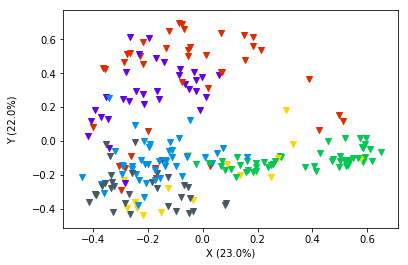

In [83]:
viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,label_x,label_y,name_docs_2,labels,dict_by_grade_and_content = dict_by_grade_and_content_2)

## Plot trajectories

In [95]:
init_vals = {'x_values':[],'y_values':[],'labels':[],'name_docs':[]}
for i in range(len(labels)):
    if labels[i].split('_')[0] == 'inicio':
        init_vals['x_values'].append(x_values[i])
        init_vals['y_values'].append(y_values[i])
        init_vals['labels'].append(labels[i])
        init_vals['name_docs'].append(name_docs_2[i])

In [97]:
end_vals = {'x_values':[],'y_values':[],'labels':[],'name_docs':[]}
for i in range(len(labels)):
    if labels[i].split('_')[0] == 'descenlace':
        end_vals['x_values'].append(x_values[i])
        end_vals['y_values'].append(y_values[i])
        end_vals['labels'].append(labels[i])
        end_vals['name_docs'].append(name_docs_2[i])

In [101]:
intermedio_0_vals = {'x_values':[],'y_values':[],'labels':[],'name_docs':[]}
for i in range(len(labels)):
    if labels[i].startswith('intermedio_0'):
        intermedio_0_vals['x_values'].append(x_values[i])
        intermedio_0_vals['y_values'].append(y_values[i])
        intermedio_0_vals['labels'].append(labels[i])
        intermedio_0_vals['name_docs'].append(name_docs_2[i])

In [104]:
intermedio_1_vals = {'x_values':[],'y_values':[],'labels':[],'name_docs':[]}
for i in range(len(labels)):
    if labels[i].startswith('intermedio_1'):
        intermedio_1_vals['x_values'].append(x_values[i])
        intermedio_1_vals['y_values'].append(y_values[i])
        intermedio_1_vals['labels'].append(labels[i])
        intermedio_1_vals['name_docs'].append(name_docs_2[i])

## colored by period of session

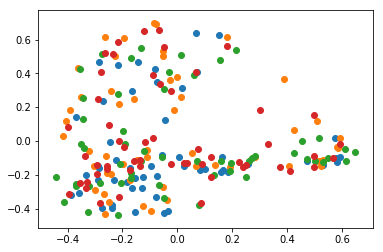

In [111]:
scatt_init = plt.scatter(init_vals['x_values'],init_vals['y_values'])
tooltips = mpld3.plugins.PointLabelTooltip(scatt_init, labels=init_vals['labels'])
mpld3.plugins.connect(plt.gcf(), tooltips)
scatt_intermedio_0 = plt.scatter(intermedio_0_vals['x_values'],intermedio_0_vals['y_values'])
tooltips_2 = mpld3.plugins.PointLabelTooltip(scatt_intermedio_0, labels=intermedio_0_vals['labels'])
mpld3.plugins.connect(plt.gcf(), tooltips_2)
scatt_intermedio_1 = plt.scatter(intermedio_1_vals['x_values'],intermedio_1_vals['y_values'])
tooltips_3 = mpld3.plugins.PointLabelTooltip(scatt_intermedio_1, labels=intermedio_1_vals['labels'])
mpld3.plugins.connect(plt.gcf(), tooltips_3)
scatt_end = plt.scatter(end_vals['x_values'],end_vals['y_values'])
tooltips_4 = mpld3.plugins.PointLabelTooltip(scatt_end, labels=end_vals['labels'])
mpld3.plugins.connect(plt.gcf(), tooltips_4)

In [137]:
intermedio_0_vals['labels'][0]

u'intermedio_0_cuarto_psu_f\xedsica_(luz)'

In [168]:
init_vals['labels'].index('inicio_segundo_mrua_y_mrur')

4

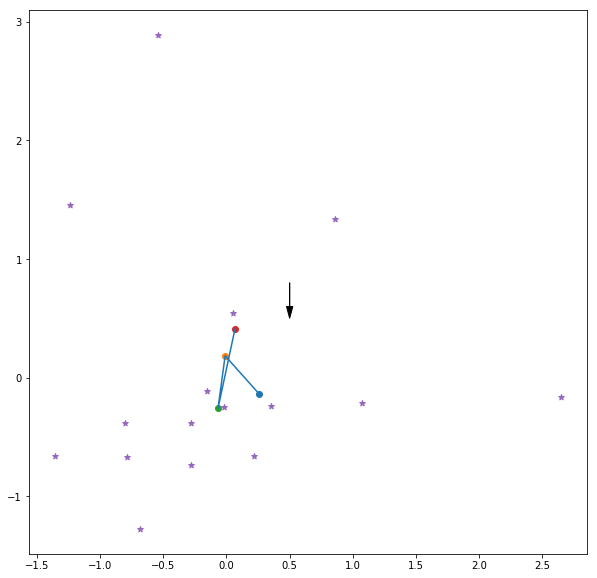

In [186]:
i = 4
# P.arrow( x, y, dx, dy, **kwargs )
scatt_init = plt.scatter(init_vals['x_values'][i],init_vals['y_values'][i])
l_i = [init_vals['labels'][i]]
tooltips = mpld3.plugins.PointLabelTooltip(scatt_init,labels=l_i)
mpld3.plugins.connect(plt.gcf(), tooltips)
scatt_intermedio_0 = plt.scatter(intermedio_0_vals['x_values'][i],intermedio_0_vals['y_values'][i])
l_int_0 = [intermedio_0_vals['labels'][i]]
tooltips_2 = mpld3.plugins.PointLabelTooltip(scatt_intermedio_0, labels=l_int_0)
mpld3.plugins.connect(plt.gcf(), tooltips_2)
scatt_intermedio_1 = plt.scatter(intermedio_1_vals['x_values'][i],intermedio_1_vals['y_values'][i])
l_int_1 = [intermedio_1_vals['labels'][i]]
tooltips_3 = mpld3.plugins.PointLabelTooltip(scatt_intermedio_1, labels=l_int_1)
mpld3.plugins.connect(plt.gcf(), tooltips_3)
scatt_end = plt.scatter(end_vals['x_values'][i],end_vals['y_values'][i])
l_end = [end_vals['labels'][i]]
tooltips_4 = mpld3.plugins.PointLabelTooltip(scatt_end, labels=l_end)
mpld3.plugins.connect(plt.gcf(), tooltips_4)
x_values_traj = [init_vals['x_values'][i],intermedio_0_vals['x_values'][i],intermedio_1_vals['x_values'][i],end_vals['x_values'][i]]
y_values_traj = [init_vals['y_values'][i],intermedio_0_vals['y_values'][i],intermedio_1_vals['y_values'][i],end_vals['y_values'][i]]
plt.plot(x_values_traj,y_values_traj)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips_4 = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
mpld3.plugins.connect(plt.gcf(), tooltips_4)

In [152]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [163]:
labels.index('intermedio_0_segundo_mrua_y_mrur')

17

In [ ]:
energy_CHECKTHIS = [20,14,15,54,26,42,41,46]
kinematics = [27,38,44,2,32,12,52]
electrodinamics = []
circuits = [31,30,22,0,48]
electrostatic = [45,3,25,17]
optics = [29,8,13,4,18,10,23,6,29]
sound = [51,36,33]
fluids = [28,53,43,50]

In [ ]:
## just init cinematica

In [166]:
len(labels)

216

In [ ]:
## just end cinematica

In [ ]:
## graph comparison

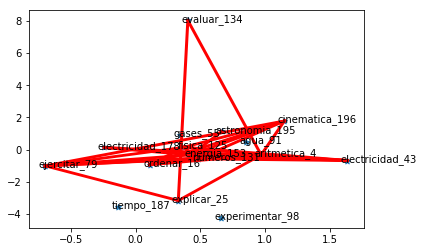

In [315]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_occurrence_matrix[i,j] > 250:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_occurrence_matrix[i,j])/2)
scatt_cm = plt.scatter(CM_sesion_x,CM_sesion_y,marker='o')
scatt_session = plt.scatter(x_values,y_values,marker='v')
#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

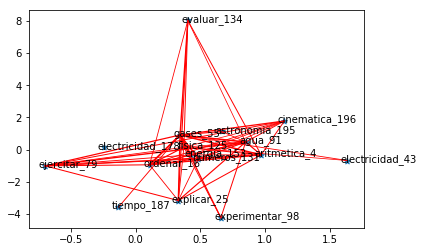

In [316]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[27][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.log(co_ocurrence_matrices[27][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

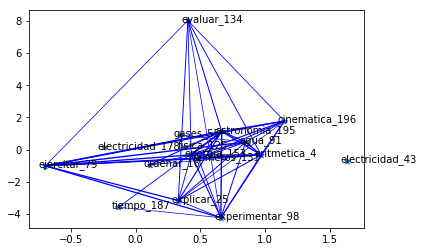

In [317]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
for i in range(n_topics):
    plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
    for j in range(n_topics):
        if i>j:
            if co_ocurrence_matrices[46][i,j] > 4:
                plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=np.log(co_ocurrence_matrices[46][i,j])/2)

#scatt = plt.scatter(T_x,T_y,marker='*',c='b')

In [318]:
diff_matrix = co_ocurrence_matrices[46] - co_ocurrence_matrices[27]
pd.DataFrame(diff_matrix).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.911970,2.737317,0.204001,-19.721827,-1.342183,-1.079709,8.910126,-1.040295,-0.609295,2.906697,3.009790,-0.918839,-1.505255,-3.161621,-5.736219,-5.357670
std,4.414147,5.848099,2.172467,26.200110,1.034071,4.436474,10.210418,1.796604,7.139505,6.328366,6.115800,6.017742,4.961075,5.492968,8.654714,6.531994
min,-11.198753,-11.544080,-5.137447,-113.676000,-3.293912,-12.821427,-7.409398,-5.236463,-20.029762,-9.228281,-8.282042,-19.136146,-16.180056,-16.545901,-32.278894,-23.594317
25%,-0.431411,-0.344215,-0.541153,-19.359550,-2.004321,-3.358755,3.830693,-1.776948,-1.918260,-0.588632,-0.880892,-1.832095,-2.309887,-3.581277,-6.344618,-5.517096
50%,1.617591,2.189089,0.376863,-12.182753,-1.027723,-0.923553,6.746860,-0.669633,-0.182301,2.658804,2.337485,-0.644507,-1.048282,-1.781500,-3.387946,-3.040088
75%,2.861723,5.880618,1.082742,-8.063881,-0.765450,1.154174,12.561995,-0.058834,2.747988,6.098625,5.720307,1.788478,1.137620,-0.653786,-1.735177,-1.795318
max,9.207846,12.882174,4.500117,-3.250265,0.367299,7.100348,37.911500,1.822420,12.455269,17.029566,19.651912,9.306402,5.648184,6.393372,5.089899,0.605103


In [82]:
np.log(1)

0.0

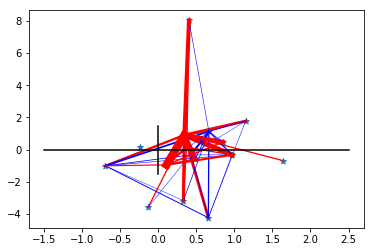

In [319]:
#viz.scatter_plot_by_grade_by_cluster(x_values,y_values,labels_clusters,'X','Y',names_docs,document_labels)
scatt = plt.scatter(T_x,T_y,marker='*')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
plot_label = True
for i in range(n_topics):
    for j in range(n_topics):
        if i>j:
            if np.abs(diff_matrix[i,j]) > 4:
                if plot_label:
                    #plt.annotate(selected_topics[i],xy=(T_x[i],T_y[i]),xytext=(T_x[i]-0.05,T_y[i]-0.05))
                    plot_label = False
                if diff_matrix[i,j] > 0:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='b',linewidth=diff_matrix[i,j]/10)
                else:
                    plt.plot([T_x[i],T_x[j]],[T_y[i],T_y[j]],c='r',linewidth=np.abs(diff_matrix[i,j])/4)
    plot_label = True
plt.plot([0,0],[1.5,-1.5],c='black')
plt.plot([2.5,-1.5],[0,0],c='black')
tooltips = mpld3.plugins.PointLabelTooltip(scatt, labels=selected_topics)
mpld3.plugins.connect(plt.gcf(), tooltips)